# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roulette/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[grid_params],
        shape_gene_pool=[
            ray_params,     
            double_parabolic_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roulette/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

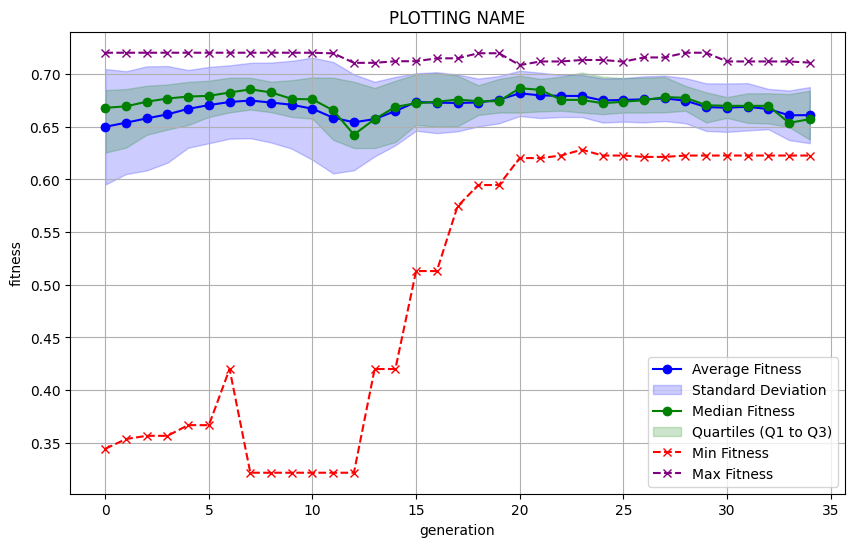

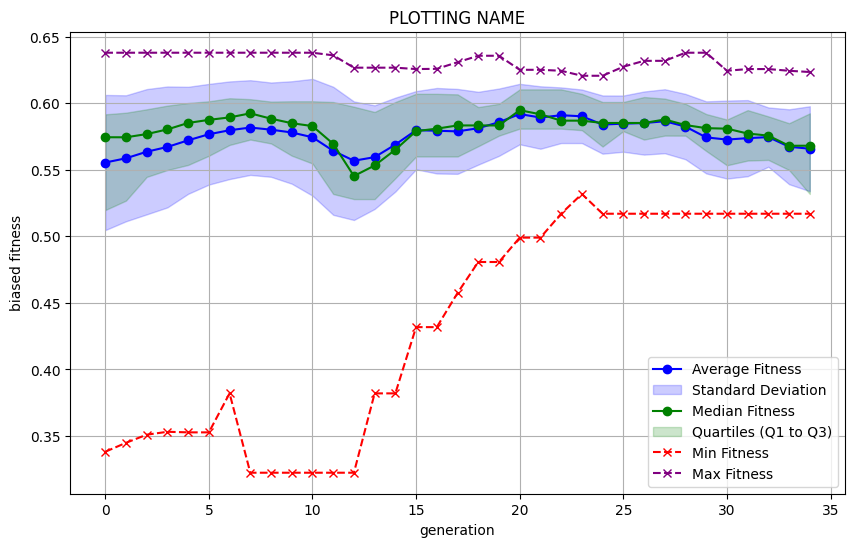

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_331: ['RayShape_56', 'GridStrictTransformation_292']
predict: (0.2909649232945912, 374.2398547000001, 461.7021756)
biased_fitness: 0.5818874491757223, fitness: 0.6606406155540874
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 2.2187950126985307, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.6762685522344953, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


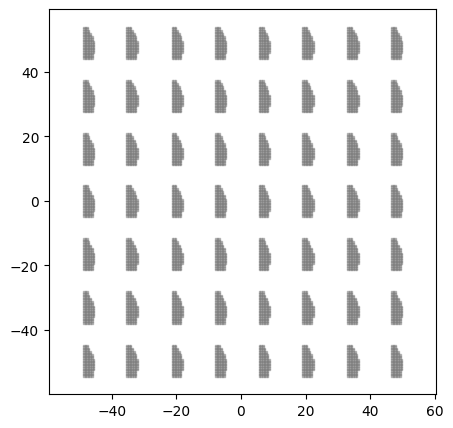

--------------------------------------------------
label: VentHole Chromosome_331: ['CircleShape_276', 'GridStrictTransformation_331']
predict: (0.2940271386213089, 373.1554856, 461.27953679999996)
biased_fitness: 0.545283557701675, fitness: 0.6375535017869108
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


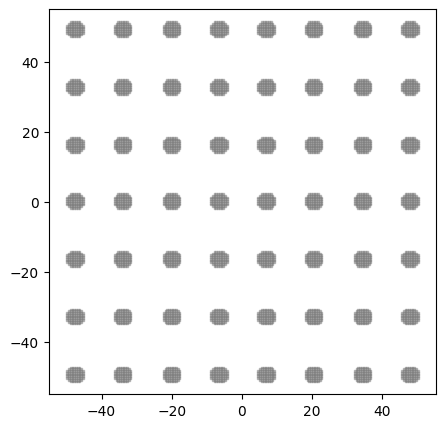

--------------------------------------------------
label: VentHole Chromosome_276: ['CircleShape_276', 'GridStrictTransformation_331']
predict: (0.2922423524603177, 372.7081096000001, 458.33673509999977)
biased_fitness: 0.5783930473555517, fitness: 0.6723522518968233
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


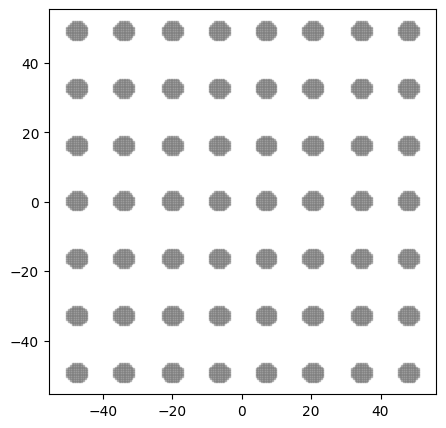

--------------------------------------------------
label: VentHole Chromosome_256: ['RayShape_331', 'GridStrictTransformation_276']
predict: (0.2909649232945912, 374.2398547000001, 461.7021756)
biased_fitness: 0.5818874491757223, fitness: 0.6606406155540874
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 2.2187950126985307, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.6762685522344953, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


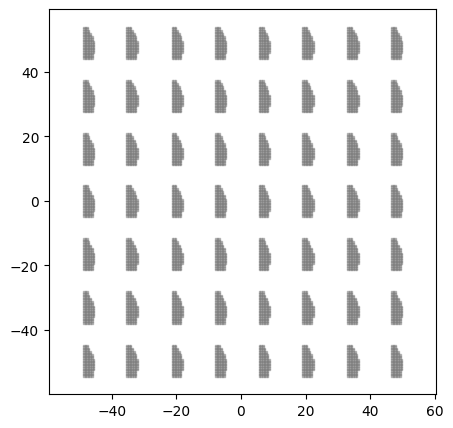

--------------------------------------------------
label: VentHole Chromosome_446: ['WingShape_247', 'GridStrictTransformation_419']
predict: (0.29053797123031355, 373.2394595, 456.6112483999998)
biased_fitness: 0.6030486084756105, fitness: 0.6953667481968653
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


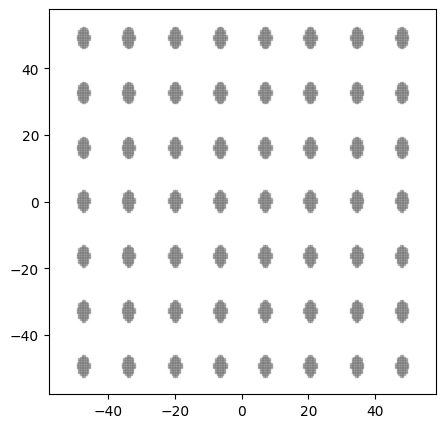

--------------------------------------------------
label: VentHole Chromosome_419: ['RayShape_56', 'GridStrictTransformation_484']
predict: (0.2961779352633611, 373.4209190999999, 459.68871570000005)
biased_fitness: 0.5170268794129448, fitness: 0.6226724733663891
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 2.2187950126985307, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.6762685522344953, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


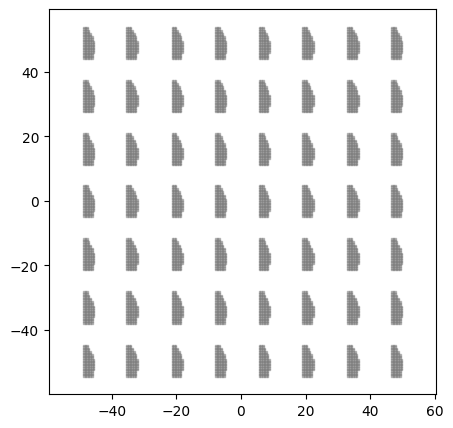

--------------------------------------------------
label: VentHole Chromosome_419: ['WingShape_276', 'GridStrictTransformation_56']
predict: (0.29076406608359995, 373.35917069999994, 455.7530343000002)
biased_fitness: 0.6010011527296005, fitness: 0.6967983141639997
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


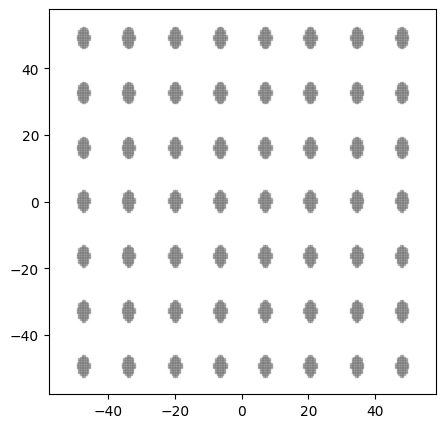

--------------------------------------------------
label: VentHole Chromosome_419: ['WingShape_419', 'GridStrictTransformation_446']
predict: (0.2913279316833721, 373.4779460999999, 455.0010249999999)
biased_fitness: 0.5940171759327909, fitness: 0.6943258276662797
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


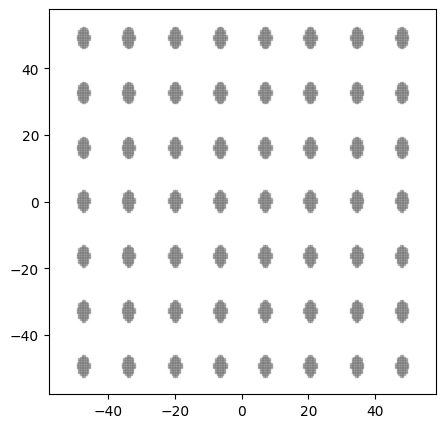

--------------------------------------------------
label: VentHole Chromosome_256: ['CircleShape_247', 'GridStrictTransformation_419']
predict: (0.2918020912073529, 374.03254140000007, 460.91930180000026)
biased_fitness: 0.5727694124970585, fitness: 0.6572198719264694
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


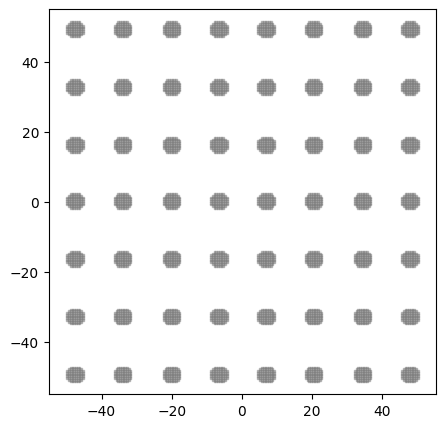

--------------------------------------------------
label: VentHole Chromosome_419: ['CircleShape_276', 'GridStrictTransformation_256']
predict: (0.29079148060798854, 372.6267128999999, 456.34926790000014)
biased_fitness: 0.6030871711881605, fitness: 0.6972052899201142
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


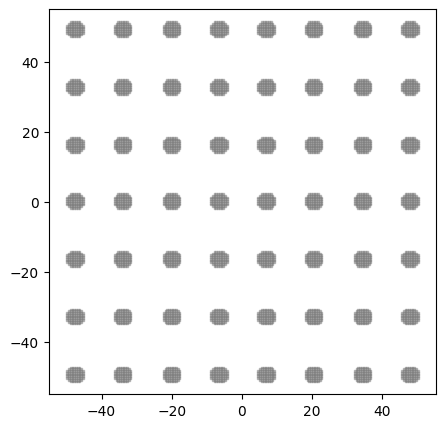

--------------------------------------------------
label: VentHole Chromosome_276: ['CircleShape_256', 'GridStrictTransformation_256']
predict: (0.2942901042761532, 374.0337726000001, 459.82800160000005)
biased_fitness: 0.5401136739338545, fitness: 0.6377900862384671
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.322788568454128, ]


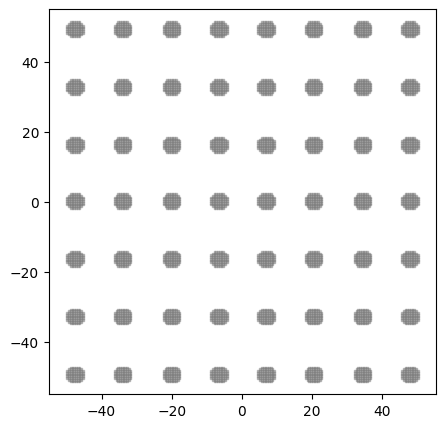

--------------------------------------------------
label: VentHole Chromosome_56: ['CircleShape_419', 'GridStrictTransformation_276']
predict: (0.29079148060798854, 372.6267128999999, 456.34926790000014)
biased_fitness: 0.6030871711881605, fitness: 0.6972052899201142
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.322788568454128, ]


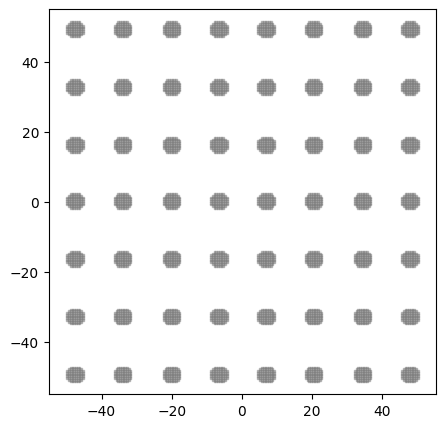

--------------------------------------------------
label: VentHole Chromosome_276: ['CircleShape_56', 'GridStrictTransformation_276']
predict: (0.2942901042761532, 374.0337726000001, 459.82800160000005)
biased_fitness: 0.5401136739338545, fitness: 0.6377900862384671
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


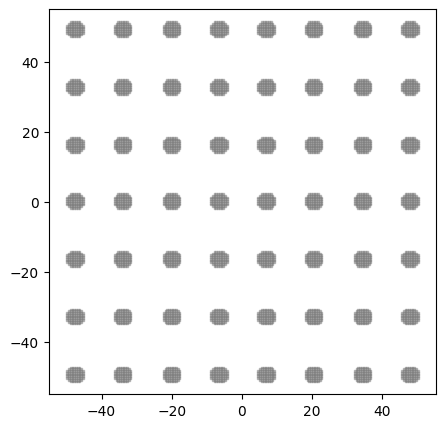

--------------------------------------------------
label: VentHole Chromosome_68: ['DoubleParabolicShape_56', 'GridStrictTransformation_56']
predict: (0.29075874542395796, 374.06135040000004, 458.74491239999986)
biased_fitness: 0.5915809872645884, fitness: 0.6783812317604208
shape parameter:
parameter_list: [ lower_coefficient: 1.0546805621154933, upper_coefficient: 2.028903086101251, lower_y-intercept: 1.0818746532534216, upper_y-intercept_from_lower_y: 1.7328223019974842, lower_x_trans: -2.8785406231116872, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.322788568454128, ]


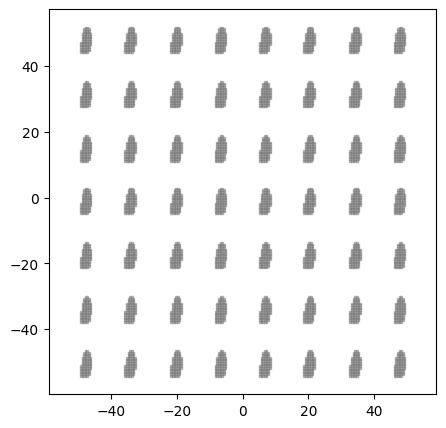

--------------------------------------------------
label: VentHole Chromosome_68: ['WingShape_292', 'GridStrictTransformation_68']
predict: (0.29053797123031355, 373.2394595, 456.6112483999998)
biased_fitness: 0.6030486084756105, fitness: 0.6953667481968653
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.322788568454128, ]


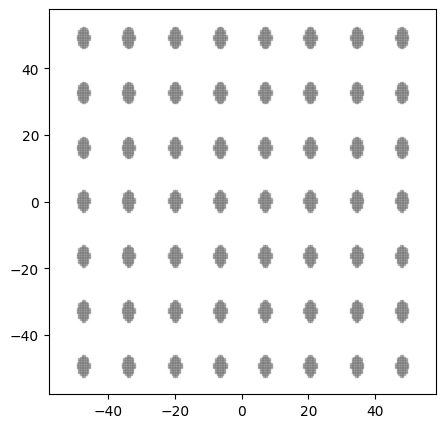

--------------------------------------------------
label: VentHole Chromosome_68: ['WingShape_68', 'GridStrictTransformation_256']
predict: (0.291477688499691, 373.8391231999999, 458.3594441999999)
biased_fitness: 0.5833978566043262, fitness: 0.6742302780030905
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


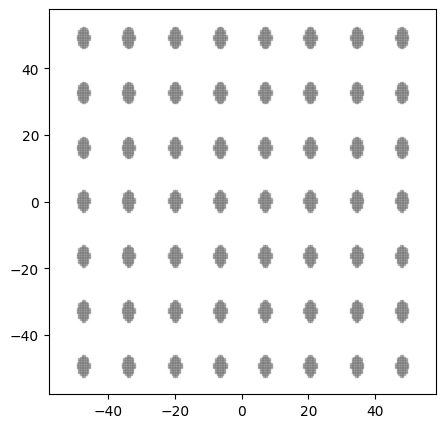

--------------------------------------------------
label: VentHole Chromosome_320: ['RayShape_68', 'GridStrictTransformation_276']
predict: (0.2961779352633611, 373.4209190999999, 459.68871570000005)
biased_fitness: 0.5170268794129448, fitness: 0.6226724733663891
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 2.2187950126985307, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.6762685522344953, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


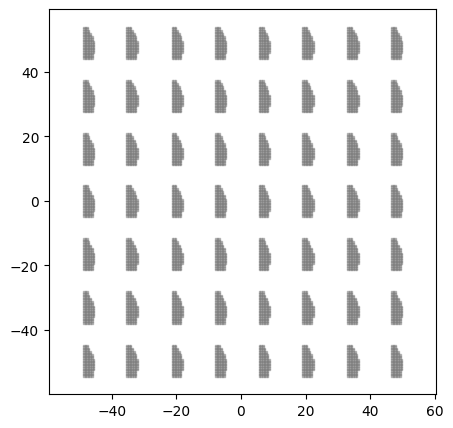

--------------------------------------------------
label: VentHole Chromosome_292: ['WingShape_419', 'GridStrictTransformation_68']
predict: (0.29053797123031355, 373.2394595, 456.6112483999998)
biased_fitness: 0.6030486084756105, fitness: 0.6953667481968653
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


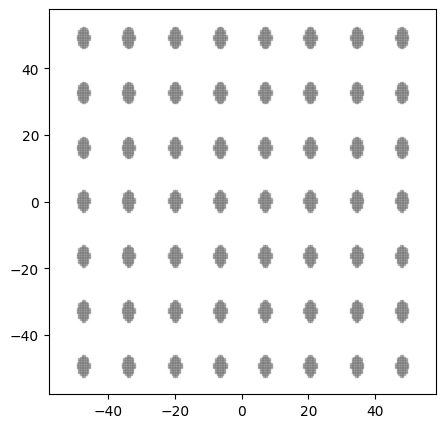

--------------------------------------------------
label: VentHole Chromosome_276: ['RayShape_56', 'GridStrictTransformation_419']
predict: (0.29591882807108005, 373.2602049, 456.4037213)
biased_fitness: 0.5280279399048791, fitness: 0.6424920882891993
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 2.2187950126985307, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.6762685522344953, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


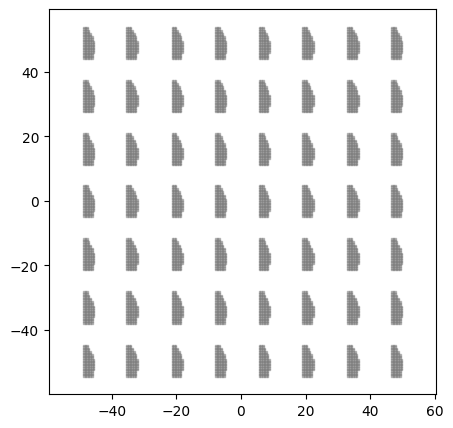

--------------------------------------------------
label: VentHole Chromosome_276: ['WingShape_56', 'GridStrictTransformation_349']
predict: (0.29030649201501935, 372.6430435, 455.15924210000003)
biased_fitness: 0.6121754100897291, fitness: 0.7079236518498064
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


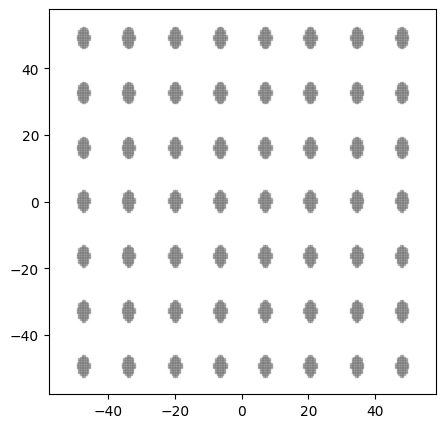

--------------------------------------------------
label: VentHole Chromosome_247: ['DoubleParabolicShape_68', 'GridStrictTransformation_276']
predict: (0.29075874542395796, 374.06135040000004, 458.74491239999986)
biased_fitness: 0.5915809872645884, fitness: 0.6783812317604208
shape parameter:
parameter_list: [ lower_coefficient: 1.0546805621154933, upper_coefficient: 2.028903086101251, lower_y-intercept: 1.0818746532534216, upper_y-intercept_from_lower_y: 1.7328223019974842, lower_x_trans: -2.8785406231116872, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


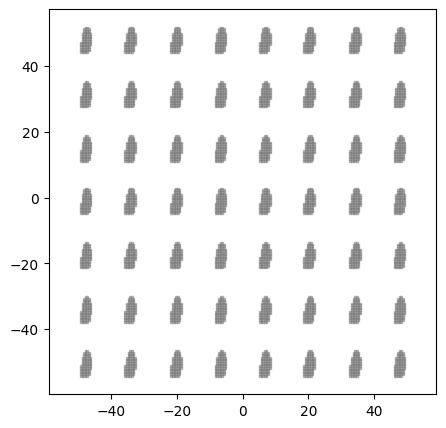

--------------------------------------------------
label: VentHole Chromosome_276: ['DoubleParabolicShape_247', 'GridStrictTransformation_292']
predict: (0.29075874542395796, 374.06135040000004, 458.74491239999986)
biased_fitness: 0.5915809872645884, fitness: 0.6783812317604208
shape parameter:
parameter_list: [ lower_coefficient: 1.0546805621154933, upper_coefficient: 2.028903086101251, lower_y-intercept: 1.0818746532534216, upper_y-intercept_from_lower_y: 1.7328223019974842, lower_x_trans: -2.8785406231116872, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


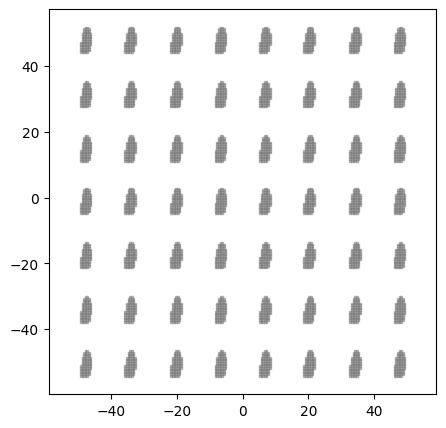

--------------------------------------------------
label: VentHole Chromosome_152: ['WingShape_292', 'GridStrictTransformation_68']
predict: (0.29212013427871497, 374.0535250999999, 460.97029499999985)
biased_fitness: 0.5681099045979912, fitness: 0.6536795567128515
shape parameter:
parameter_list: [ c: 3.894920480057156, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


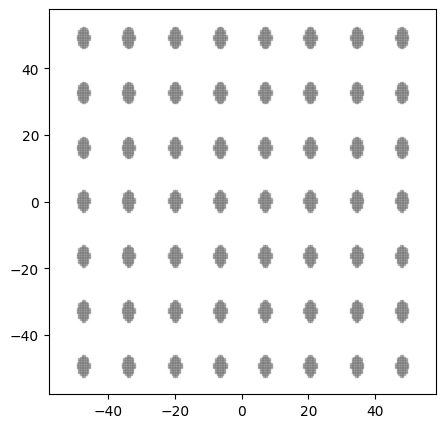

--------------------------------------------------
label: VentHole Chromosome_276: ['DoubleParabolicShape_419', 'GridStrictTransformation_349']
predict: (0.29075874542395796, 374.06135040000004, 458.74491239999986)
biased_fitness: 0.5915809872645884, fitness: 0.6783812317604208
shape parameter:
parameter_list: [ lower_coefficient: 1.0546805621154933, upper_coefficient: 2.028903086101251, lower_y-intercept: 1.0818746532534216, upper_y-intercept_from_lower_y: 1.7328223019974842, lower_x_trans: -2.8785406231116872, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


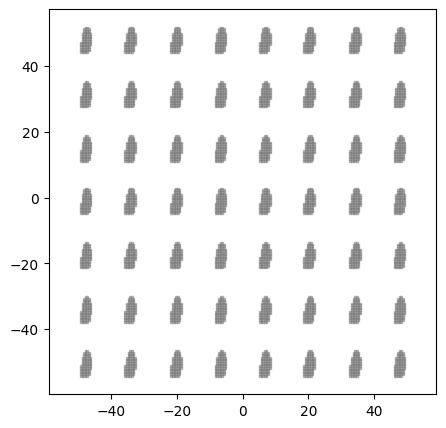

--------------------------------------------------
label: VentHole Chromosome_276: ['WingShape_276', 'GridStrictTransformation_256']
predict: (0.29076406608359995, 373.35917069999994, 455.7530343000002)
biased_fitness: 0.6010011527296005, fitness: 0.6967983141639997
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


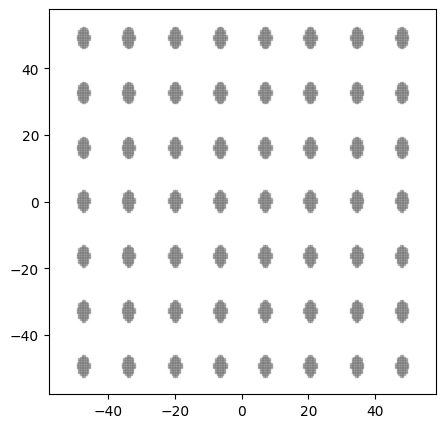

--------------------------------------------------
label: VentHole Chromosome_360: ['RayShape_279', 'GridStrictTransformation_276']
predict: (0.2961779352633611, 373.4209190999999, 459.68871570000005)
biased_fitness: 0.5170268794129448, fitness: 0.6226724733663891
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 2.2187950126985307, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.6762685522344953, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


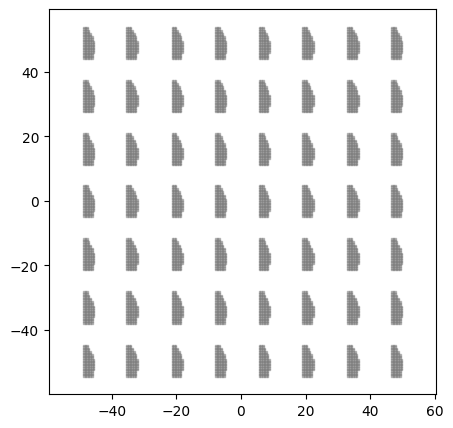

--------------------------------------------------
label: VentHole Chromosome_68: ['RayShape_256', 'GridStrictTransformation_360']
predict: (0.2927044437544377, 373.69432870000014, 454.86212390000014)
biased_fitness: 0.5739418961378708, fitness: 0.6801732994556213
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 1.9910670916120183, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.4363112649723453, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


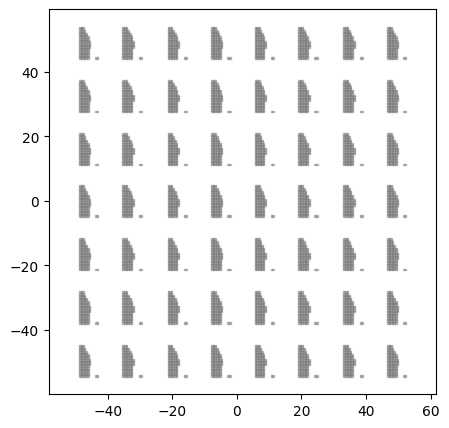

--------------------------------------------------
label: VentHole Chromosome_292: ['WingShape_276', 'GridStrictTransformation_68']
predict: (0.2914692534841139, 373.3672735999999, 459.73154409999995)
biased_fitness: 0.5831309950224057, fitness: 0.6698133766588615
shape parameter:
parameter_list: [ c: 3.894920480057156, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


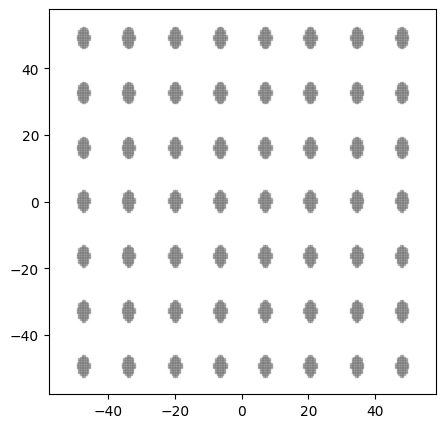

--------------------------------------------------
label: VentHole Chromosome_349: ['RayShape_446', 'GridStrictTransformation_68']
predict: (0.2951422160878594, 373.9051390999998, 460.84754009999995)
biased_fitness: 0.5267881990699693, fitness: 0.6248144431214071
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 2.2187950126985307, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.6762685522344953, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.322788568454128, ]


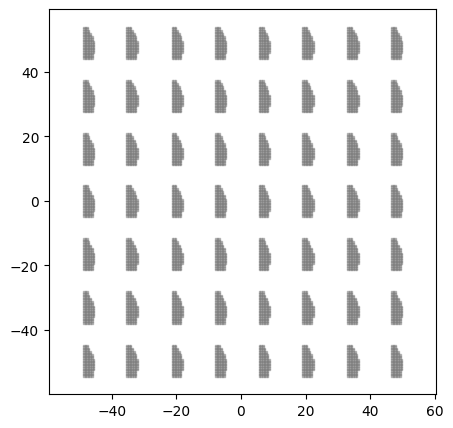

--------------------------------------------------
label: VentHole Chromosome_292: ['RayShape_68', 'GridStrictTransformation_56']
predict: (0.2907750586152622, 374.04714319999994, 460.8588477999999)
biased_fitness: 0.5871957677863294, fitness: 0.6677194588473785
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 1.9910670916120183, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.4363112649723453, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.322788568454128, ]


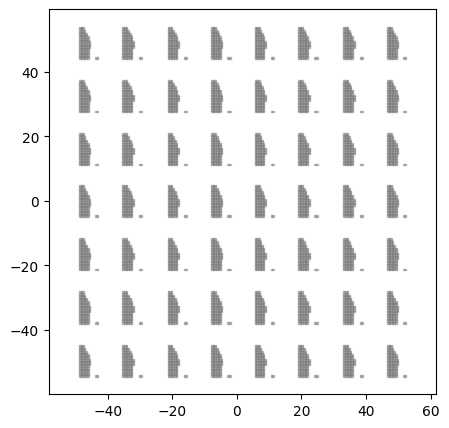

--------------------------------------------------
label: VentHole Chromosome_68: ['WingShape_292', 'GridStrictTransformation_292']
predict: (0.29212013427871497, 374.0535250999999, 460.97029499999985)
biased_fitness: 0.5681099045979912, fitness: 0.6536795567128515
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


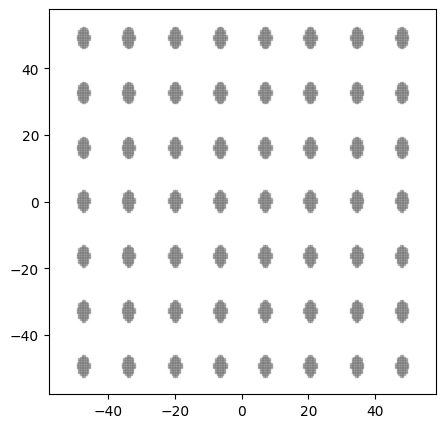

--------------------------------------------------
label: VentHole Chromosome_68: ['WingShape_292', 'GridStrictTransformation_419']
predict: (0.29044109806373397, 373.00130109999986, 456.6051914)
biased_fitness: 0.6056077388077249, fitness: 0.6975565568626607
shape parameter:
parameter_list: [ c: 3.894920480057156, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.322788568454128, ]


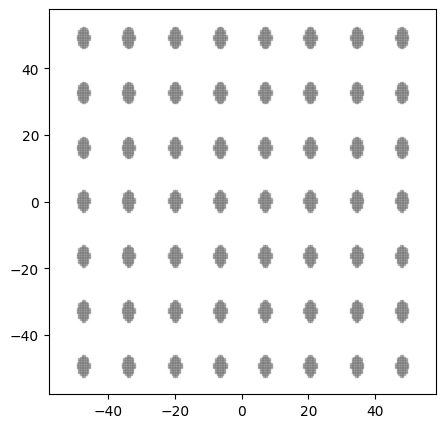

--------------------------------------------------
label: VentHole Chromosome_412: ['WingShape_360', 'GridStrictTransformation_419']
predict: (0.2914692534841139, 373.3672735999999, 459.73154409999995)
biased_fitness: 0.5831309950224057, fitness: 0.6698133766588615
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.369654747598925, ]


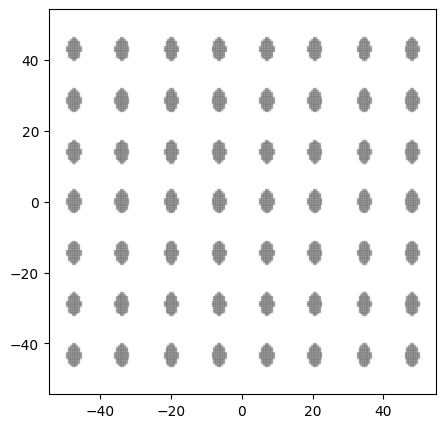

--------------------------------------------------
label: VentHole Chromosome_14: ['WingShape_68', 'GridStrictTransformation_484']
predict: (0.29212013427871497, 374.0535250999999, 460.97029499999985)
biased_fitness: 0.5681099045979912, fitness: 0.6536795567128515
shape parameter:
parameter_list: [ c: 3.1206671239770274, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


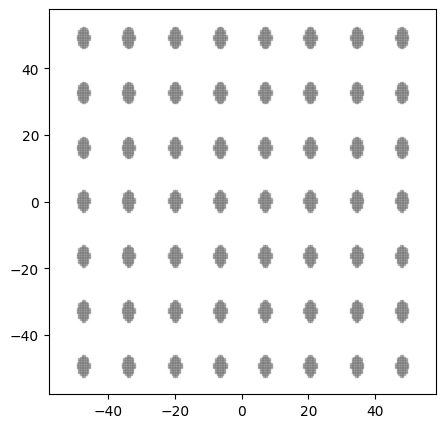

--------------------------------------------------
label: VentHole Chromosome_64: ['RayShape_292', 'GridStrictTransformation_412']
predict: (0.29207011833998364, 372.3452387, 457.3812958999999)
biased_fitness: 0.5845295579402292, fitness: 0.6806661436001642
shape parameter:
parameter_list: [ upper_slope: 2.089332032329623, nose_point: 1.9910670916120183, lower_coefficient: 3.5266408011093087, lower_x-intercept: 2.4363112649723453, lower_y-intercept: 1.4128330096674653, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 6.415023024959843, ]


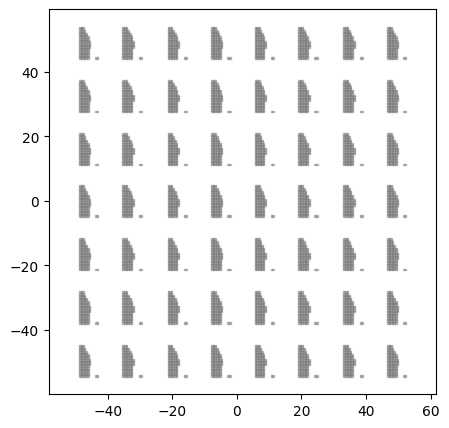

--------------------------------------------------
label: VentHole Chromosome_419: ['CircleShape_419', 'GridStrictTransformation_412']
predict: (0.29096993117483083, 372.76256880000017, 455.7969519999998)
biased_fitness: 0.6010142155523678, fitness: 0.6975030842516917
shape parameter:
parameter_list: [ r: 2.3549146947908532, ]
pattern parameter:
parameter_list: [ dx: 3.6007030702703253, dy: 4.369654747598925, ]


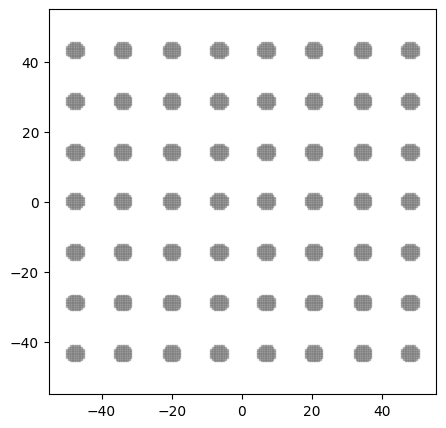

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )